In [110]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD 

In [111]:
df = pd.read_csv('crime_data.csv')

In [112]:
df.isnull().any()

jurisdiction                                             False
year                                                     False
population                                               False
murder                                                   False
rape                                                     False
robbery                                                  False
agg_assault                                              False
b_e                                                      False
larceny_theft                                            False
m_v_theft                                                False
grand_total                                              False
violent_crime_total                                      False
violent_crime_percent                                    False
property_crime_totals                                    False
property_crime_percent                                   False
overall_crime_rate_per_100_000_people                  

In [113]:
df = df.fillna(0)
df.isnull().any()

jurisdiction                                             False
year                                                     False
population                                               False
murder                                                   False
rape                                                     False
robbery                                                  False
agg_assault                                              False
b_e                                                      False
larceny_theft                                            False
m_v_theft                                                False
grand_total                                              False
violent_crime_total                                      False
violent_crime_percent                                    False
property_crime_totals                                    False
property_crime_percent                                   False
overall_crime_rate_per_100_000_people                  

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   jurisdiction                                           1104 non-null   object 
 1   year                                                   1104 non-null   int64  
 2   population                                             1104 non-null   int64  
 3   murder                                                 1104 non-null   int64  
 4   rape                                                   1104 non-null   int64  
 5   robbery                                                1104 non-null   int64  
 6   agg_assault                                            1104 non-null   int64  
 7   b_e                                                    1104 non-null   int64  
 8   larceny_theft                                   

In [119]:
df.rename(columns={'agg_assault':'Aggravated Assault','b_e':'Breaking & Entering', 'm_v_theft':'Motor Vehicle Theft'}, inplace=True)

In [120]:
list=df.columns
list

Index(['jurisdiction', 'year', 'population', 'murder', 'rape', 'robbery',
       'Aggravated Assault', 'Breaking & Entering', 'larceny_theft',
       'Motor Vehicle Theft', 'grand_total', 'violent_crime_total',
       'violent_crime_percent', 'property_crime_totals',
       'property_crime_percent', 'overall_crime_rate_per_100_000_people',
       'violent_crime_rate_per_100_000_people',
       'property_crime_rate_per_100_000_people', 'murder_per_100_000_people',
       'rape_per_100_000_people', 'robbery_per_100_000_people',
       'agg_assault_per_100_000_people', 'b_e_per_100_000_people',
       'larceny_theft_per_100_000_people', 'm_v_theft_per_100_000_people',
       'percent_change', 'violent_crime_percent_change',
       'property_crime_percent_change',
       'overall_percent_change_per_100_000_people',
       'violent_crime_rate_percent_change_per_100_000_people',
       'property_crime_rate_percent_change_per_100_000_people',
       'murder_rate_percent_change_per_100_000_peo

In [121]:
df.head()

,jurisdiction,year,population,murder,rape,robbery,Aggravated Assault,Breaking & Entering,larceny_theft,Motor Vehicle Theft,...,overall_percent_change_per_100_000_people,violent_crime_rate_percent_change_per_100_000_people,property_crime_rate_percent_change_per_100_000_people,murder_rate_percent_change_per_100_000_people,rape_rate_percent_change_per_100_000_people,robbery_rate_percent_change_per_100_000_people,agg_assault_rate_percent_change_per_100_000_people,b_e_rate_percent_change_per_100_000_people,larceny_theft_rate_percent_change_per_100_000_people,m_v_theft_rate_percent_change_per_100_000_people
0,Allegany County,1975,79655,3,5,20,114,669,1425,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Allegany County,1976,83923,2,2,24,59,581,1384,73,...,-13.4,-41.8,-11.6,-36.7,-62.0,13.9,-50.9,-17.6,-7.8,-25.5
2,Allegany County,1977,82102,3,7,32,85,592,1390,102,...,6.4,49.2,4.5,53.3,257.8,36.3,47.3,4.2,2.7,42.8
3,Allegany County,1978,79966,1,2,18,81,539,1390,100,...,-1.0,-17.5,0.0,-65.8,-70.7,-42.2,-2.2,-6.5,2.7,0.7
4,Allegany County,1979,79721,1,7,18,84,502,1611,99,...,9.3,8.2,9.4,0.3,251.1,0.3,4.0,-6.6,16.3,-0.7


C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

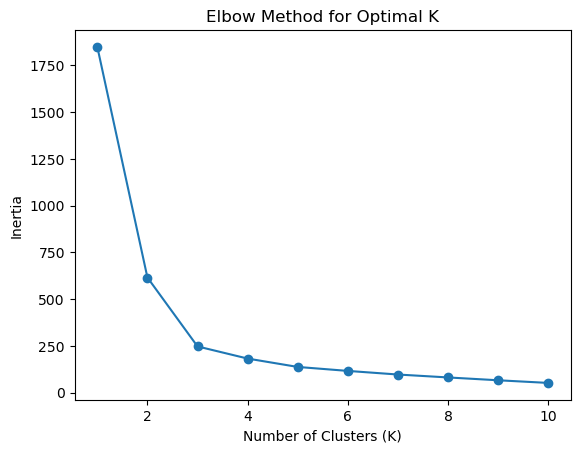

In [127]:

selected_features = ['murder', 'rape', 'robbery', 'Aggravated Assault', 'Breaking & Entering', 'larceny_theft', 'Motor Vehicle Theft']
df_selected = df[df['year'].between(2010, 2020)][selected_features]

# Normalize the data
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_selected)

# Choose the optimal number of clusters (K)
# Example: using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [128]:
df_normalized

array([[-0.2717248 , -0.40726822, -0.38840949, ..., -0.29630202,
        -0.4113677 , -0.42529564],
       [-0.23715355, -0.36595852, -0.37362696, ..., -0.28932145,
        -0.421046  , -0.43021461],
       [-0.28901042, -0.44857791, -0.39474486, ..., -0.31084489,
        -0.41435918, -0.41053872],
       ...,
       [-0.3408673 , -0.55185215, -0.41375098, ..., -0.51793526,
        -0.54211272, -0.43759308],
       [-0.3408673 , -0.55185215, -0.41375098, ..., -0.53480498,
        -0.55830188, -0.44087239],
       [-0.32358168, -0.3556311 , -0.39791255, ..., -0.53305984,
        -0.55847785, -0.44251205]])

C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

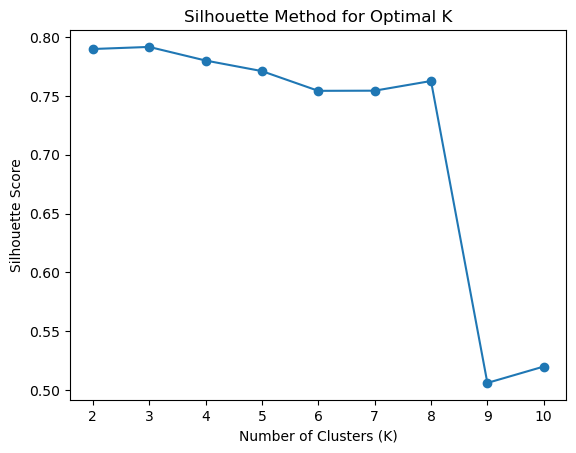

In [129]:

silhouette_scores = []
for k in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_normalized)
    silhouette_avg = silhouette_score(df_normalized, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Method
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


## Clustering for k=3

In [130]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

selected_features = ['murder', 'rape', 'robbery', 'Aggravated Assault', 'Breaking & Entering', 'larceny_theft', 'Motor Vehicle Theft']
df_selected = df[df['year'].between(2010, 2020)][selected_features]

# Normalize the data
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_selected)


optimal_k = 3  

# Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(df_normalized)

# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(df_normalized)

# Add cluster labels and cosine similarity to the DataFrame
df_clustered = df[df['year'].between(2010, 2020)][['jurisdiction', 'year']].copy()
df_clustered['cluster'] = cluster_labels

# Add cosine similarity columns
for i in range(optimal_k):
    df_clustered[f'cosine_similarity_cluster_{i + 1}'] = similarity_matrix[:, i]


df_clustered



C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,jurisdiction,year,cluster,cosine_similarity_cluster_1,cosine_similarity_cluster_2,cosine_similarity_cluster_3
35,Allegany County,2010,0,1.000000,0.995745,0.998987
36,Allegany County,2011,0,0.995745,1.000000,0.994282
37,Allegany County,2012,0,0.998987,0.994282,1.000000
38,Allegany County,2013,0,0.997035,0.998841,0.996616
39,Allegany County,2014,0,0.996529,0.991426,0.999050
...,...,...,...,...,...,...
1099,Worcester County,2016,0,0.990052,0.989160,0.992352
1100,Worcester County,2017,0,0.983800,0.984883,0.984328
1101,Worcester County,2018,0,0.987713,0.983817,0.990796
1102,Worcester County,2019,0,0.986422,0.982287,0.989239


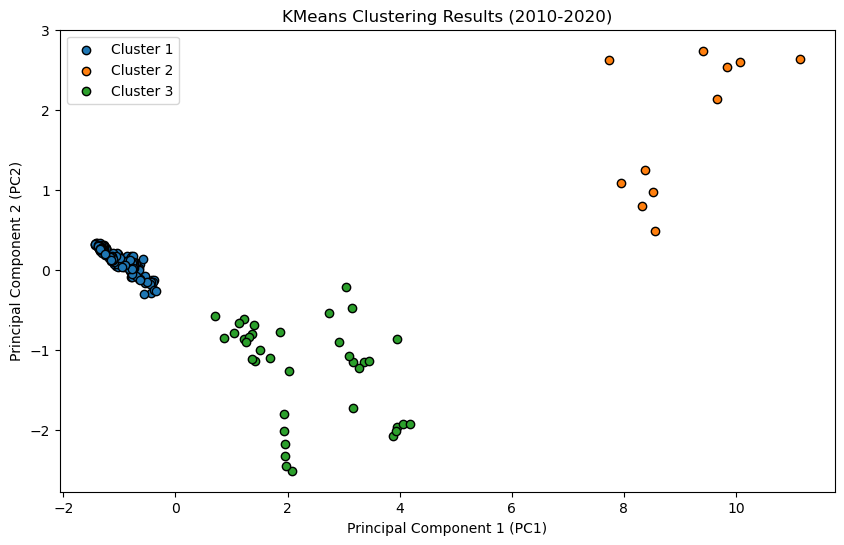

In [133]:
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_normalized), columns=['PC1', 'PC2'])
# Add cluster labels to the DataFrame
df_pca['Cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster + 1}', edgecolor='black')

plt.title('KMeans Clustering Results (2010-2020)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

In [167]:
cluster_0_entries = df_clustered[df_clustered['cluster'] == 0].sort_values(by='cosine_similarity_cluster_1', ascending=False)
pd.set_option('display.max_rows', None)
print(cluster_0_entries)



             jurisdiction  year  cluster  cosine_similarity_cluster_1  \
35        Allegany County  2010        0                     1.000000   
37        Allegany County  2012        0                     0.998987   
914     St. Mary's County  2015        0                     0.997760   
314        Carroll County  2013        0                     0.997182   
38        Allegany County  2013        0                     0.997035   
312        Carroll County  2011        0                     0.996824   
39        Allegany County  2014        0                     0.996529   
44        Allegany County  2015        0                     0.996456   
913     St. Mary's County  2014        0                     0.996429   
916     St. Mary's County  2017        0                     0.995968   
1095     Worcester County  2012        0                     0.995941   
36        Allegany County  2011        0                     0.995745   
362          Cecil County  2015        0           

In [168]:
cluster_1_entries = df_clustered[df_clustered['cluster'] == 1].sort_values(by='cosine_similarity_cluster_2', ascending=False)
pd.set_option('display.max_rows', None)
print(cluster_1_entries)

               jurisdiction  year  cluster  cosine_similarity_cluster_1  \
733       Montgomery County  2018        1                    -0.597862   
734       Montgomery County  2019        1                    -0.616699   
735       Montgomery County  2020        1                    -0.636219   
731       Montgomery County  2016        1                    -0.669678   
732       Montgomery County  2017        1                    -0.689594   
730       Montgomery County  2015        1                    -0.739950   
90      Anne Arundel County  2019        1                    -0.718907   
729       Montgomery County  2014        1                    -0.727825   
84      Anne Arundel County  2013        1                    -0.703356   
726       Montgomery County  2011        1                    -0.747931   
728       Montgomery County  2013        1                    -0.750965   
725       Montgomery County  2010        1                    -0.761883   
727       Montgomery Coun

In [169]:
cluster_2_entries = df_clustered[df_clustered['cluster'] == 2].sort_values(by='cosine_similarity_cluster_3', ascending=False)
pd.set_option('display.max_rows', None)
print(cluster_2_entries)

               jurisdiction  year  cluster  cosine_similarity_cluster_1  \
137          Baltimore City  2020        2                    -0.866823   
772  Prince George's County  2011        2                    -0.911957   
771  Prince George's County  2010        2                    -0.914050   
136          Baltimore City  2019        2                    -0.909364   
132          Baltimore City  2015        2                    -0.923998   
133          Baltimore City  2016        2                    -0.932170   
134          Baltimore City  2017        2                    -0.933976   
135          Baltimore City  2018        2                    -0.938474   
127          Baltimore City  2010        2                    -0.944262   
131          Baltimore City  2014        2                    -0.959430   
128          Baltimore City  2011        2                    -0.955990   
129          Baltimore City  2012        2                    -0.959096   
130          Baltimore Ci

## CLustering for K=4

In [148]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

selected_features1 = ['murder', 'rape', 'robbery', 'Aggravated Assault', 'Breaking & Entering', 'larceny_theft', 'Motor Vehicle Theft']
df_selected1 = df[df['year'].between(2010, 2020)][selected_features]

# Normalize the data
scaler = StandardScaler()
df_normalized1 = scaler.fit_transform(df_selected1)


k = 4

# Apply KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(df_normalized1)

# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(df_normalized1)

# Add cluster labels and cosine similarity to the DataFrame
df_clustered1 = df[df['year'].between(2010, 2020)][['jurisdiction', 'year']].copy()
df_clustered1['cluster'] = cluster_labels

# Add cosine similarity columns
for i in range(k):
    df_clustered1[f'cosine_similarity_cluster_{i + 1}'] = similarity_matrix[:, i]


df_clustered1


C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,jurisdiction,year,cluster,cosine_similarity_cluster_1,cosine_similarity_cluster_2,cosine_similarity_cluster_3,cosine_similarity_cluster_4
35,Allegany County,2010,0,1.000000,0.995745,0.998987,0.997035
36,Allegany County,2011,0,0.995745,1.000000,0.994282,0.998841
37,Allegany County,2012,0,0.998987,0.994282,1.000000,0.996616
38,Allegany County,2013,0,0.997035,0.998841,0.996616,1.000000
39,Allegany County,2014,0,0.996529,0.991426,0.999050,0.993955
40,Allegany County,2017,0,0.994179,0.989102,0.996868,0.992558
41,Allegany County,2018,0,0.993306,0.988667,0.993742,0.993563
42,Allegany County,2019,0,0.989670,0.987021,0.989786,0.992837
43,Allegany County,2020,0,0.987929,0.983613,0.988660,0.989834
44,Allegany County,2015,0,0.996456,0.996882,0.997314,0.999338


<function matplotlib.pyplot.show(close=None, block=None)>

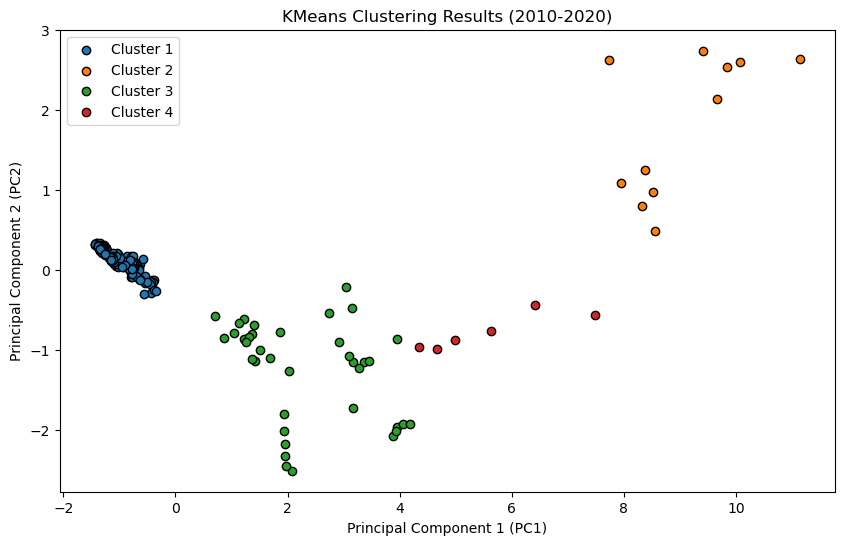

In [149]:
pca = PCA(n_components=2)
df_pca1 = pd.DataFrame(pca.fit_transform(df_normalized1), columns=['PC1', 'PC2'])
# Add cluster labels to the DataFrame
df_pca1['Cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data1 = df_pca1[df_pca1['Cluster'] == cluster]
    plt.scatter(cluster_data1['PC1'], cluster_data1['PC2'], label=f'Cluster {cluster + 1}', edgecolor='black')

plt.title('KMeans Clustering Results (2010-2020)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show

In [170]:
cluster_0_entries1 = df_clustered1[df_clustered1['cluster'] == 0].sort_values(by='cosine_similarity_cluster_1', ascending=False)
pd.set_option('display.max_rows', None)
print(cluster_0_entries1)


             jurisdiction  year  cluster  cosine_similarity_cluster_1  \
35        Allegany County  2010        0                     1.000000   
37        Allegany County  2012        0                     0.998987   
914     St. Mary's County  2015        0                     0.997760   
314        Carroll County  2013        0                     0.997182   
38        Allegany County  2013        0                     0.997035   
312        Carroll County  2011        0                     0.996824   
39        Allegany County  2014        0                     0.996529   
44        Allegany County  2015        0                     0.996456   
913     St. Mary's County  2014        0                     0.996429   
916     St. Mary's County  2017        0                     0.995968   
1095     Worcester County  2012        0                     0.995941   
36        Allegany County  2011        0                     0.995745   
362          Cecil County  2015        0           

In [171]:
cluster_1_entries1 = df_clustered1[df_clustered1['cluster'] == 1].sort_values(by='cosine_similarity_cluster_2', ascending=False)
pd.set_option('display.max_rows', None)
print(cluster_1_entries1)


       jurisdiction  year  cluster  cosine_similarity_cluster_1  \
137  Baltimore City  2020        1                    -0.866823   
136  Baltimore City  2019        1                    -0.909364   
132  Baltimore City  2015        1                    -0.923998   
133  Baltimore City  2016        1                    -0.932170   
134  Baltimore City  2017        1                    -0.933976   
135  Baltimore City  2018        1                    -0.938474   
127  Baltimore City  2010        1                    -0.944262   
128  Baltimore City  2011        1                    -0.955990   
129  Baltimore City  2012        1                    -0.959096   
131  Baltimore City  2014        1                    -0.959430   
130  Baltimore City  2013        1                    -0.963214   

     cosine_similarity_cluster_2  cosine_similarity_cluster_3  \
137                    -0.859030                    -0.875698   
136                    -0.901092                    -0.913516   


In [172]:
cluster_2_entries1 = df_clustered1[df_clustered1['cluster'] == 2].sort_values(by='cosine_similarity_cluster_3', ascending=False)
pd.set_option('display.max_rows', None)
print(cluster_2_entries1)

               jurisdiction  year  cluster  cosine_similarity_cluster_1  \
733       Montgomery County  2018        2                    -0.597862   
734       Montgomery County  2019        2                    -0.616699   
735       Montgomery County  2020        2                    -0.636219   
731       Montgomery County  2016        2                    -0.669678   
84      Anne Arundel County  2013        2                    -0.703356   
732       Montgomery County  2017        2                    -0.689594   
91      Anne Arundel County  2020        2                    -0.689132   
729       Montgomery County  2014        2                    -0.727825   
90      Anne Arundel County  2019        2                    -0.718907   
726       Montgomery County  2011        2                    -0.747931   
728       Montgomery County  2013        2                    -0.750965   
727       Montgomery County  2012        2                    -0.757400   
725       Montgomery Coun

In [173]:
cluster_3_entries1 = df_clustered1[df_clustered1['cluster'] == 3].sort_values(by='cosine_similarity_cluster_4', ascending=False)
pd.set_option('display.max_rows', None)
print(cluster_3_entries1)

               jurisdiction  year  cluster  cosine_similarity_cluster_1  \
772  Prince George's County  2011        3                    -0.911957   
771  Prince George's County  2010        3                    -0.914050   
773  Prince George's County  2012        3                    -0.918674   
774  Prince George's County  2013        3                    -0.925775   
775  Prince George's County  2014        3                    -0.941796   
776  Prince George's County  2015        3                    -0.981220   

     cosine_similarity_cluster_2  cosine_similarity_cluster_3  \
772                    -0.909133                    -0.897148   
771                    -0.912900                    -0.899594   
773                    -0.919095                    -0.903703   
774                    -0.927465                    -0.913322   
775                    -0.939338                    -0.929773   
776                    -0.969579                    -0.978210   

     cosine_simila

## Clustering for K=2

In [154]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

selected_features2 = ['murder', 'rape', 'robbery', 'Aggravated Assault', 'Breaking & Entering', 'larceny_theft', 'Motor Vehicle Theft']
df_selected2 = df[df['year'].between(2010, 2020)][selected_features]

# Normalize the data
scaler = StandardScaler()
df_normalized2 = scaler.fit_transform(df_selected2)


k = 2

# Apply KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(df_normalized2)

# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(df_normalized2)

# Add cluster labels and cosine similarity to the DataFrame
df_clustered2 = df[df['year'].between(2010, 2020)][['jurisdiction', 'year']].copy()
df_clustered2['cluster'] = cluster_labels

# Add cosine similarity columns
for i in range(k):
    df_clustered2[f'cosine_similarity_cluster_{i + 1}'] = similarity_matrix[:, i]


df_clustered2

C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,jurisdiction,year,cluster,cosine_similarity_cluster_1,cosine_similarity_cluster_2
35,Allegany County,2010,0,1.000000,0.995745
36,Allegany County,2011,0,0.995745,1.000000
37,Allegany County,2012,0,0.998987,0.994282
38,Allegany County,2013,0,0.997035,0.998841
39,Allegany County,2014,0,0.996529,0.991426
40,Allegany County,2017,0,0.994179,0.989102
41,Allegany County,2018,0,0.993306,0.988667
42,Allegany County,2019,0,0.989670,0.987021
43,Allegany County,2020,0,0.987929,0.983613
44,Allegany County,2015,0,0.996456,0.996882


<function matplotlib.pyplot.show(close=None, block=None)>

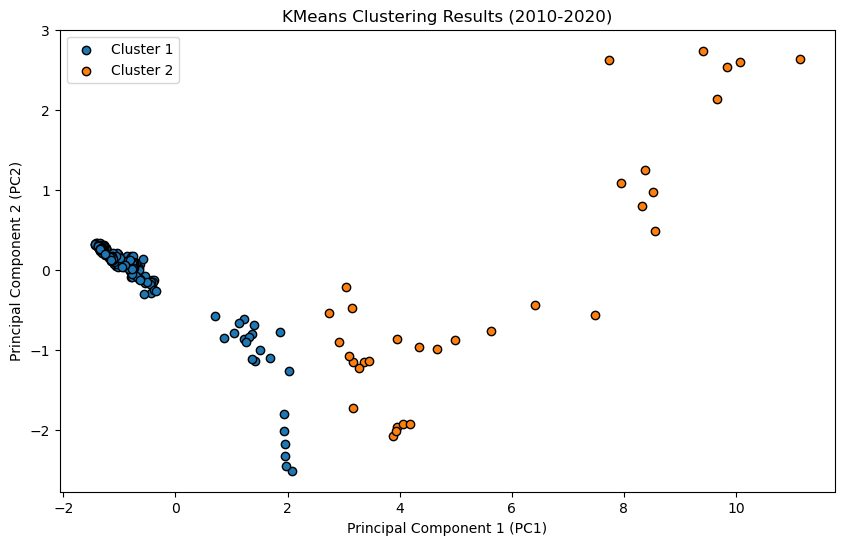

In [155]:
pca = PCA(n_components=2)
df_pca2 = pd.DataFrame(pca.fit_transform(df_normalized2), columns=['PC1', 'PC2'])
# Add cluster labels to the DataFrame
df_pca2['Cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data2 = df_pca2[df_pca2['Cluster'] == cluster]
    plt.scatter(cluster_data2['PC1'], cluster_data2['PC2'], label=f'Cluster {cluster + 1}', edgecolor='black')

plt.title('KMeans Clustering Results (2010-2020)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show

In [174]:
cluster_0_entries2 = df_clustered2[df_clustered2['cluster'] == 0].sort_values(by='cosine_similarity_cluster_1', ascending=False)
pd.set_option('display.max_rows', None)
print(cluster_0_entries2)

             jurisdiction  year  cluster  cosine_similarity_cluster_1  \
35        Allegany County  2010        0                     1.000000   
37        Allegany County  2012        0                     0.998987   
914     St. Mary's County  2015        0                     0.997760   
314        Carroll County  2013        0                     0.997182   
38        Allegany County  2013        0                     0.997035   
312        Carroll County  2011        0                     0.996824   
39        Allegany County  2014        0                     0.996529   
44        Allegany County  2015        0                     0.996456   
913     St. Mary's County  2014        0                     0.996429   
916     St. Mary's County  2017        0                     0.995968   
1095     Worcester County  2012        0                     0.995941   
36        Allegany County  2011        0                     0.995745   
362          Cecil County  2015        0           

In [175]:
cluster_1_entries2 = df_clustered2[df_clustered2['cluster'] == 0].sort_values(by='cosine_similarity_cluster_2', ascending=False)
pd.set_option('display.max_rows', None)
print(cluster_1_entries2)

             jurisdiction  year  cluster  cosine_similarity_cluster_1  \
36        Allegany County  2011        0                     0.995745   
38        Allegany County  2013        0                     0.997035   
44        Allegany County  2015        0                     0.996456   
35        Allegany County  2010        0                     1.000000   
362          Cecil County  2015        0                     0.995307   
916     St. Mary's County  2017        0                     0.995968   
37        Allegany County  2012        0                     0.998987   
312        Carroll County  2011        0                     0.996824   
915     St. Mary's County  2016        0                     0.993798   
314        Carroll County  2013        0                     0.997182   
913     St. Mary's County  2014        0                     0.996429   
39        Allegany County  2014        0                     0.996529   
1095     Worcester County  2012        0           

# Hierarchical Clustering

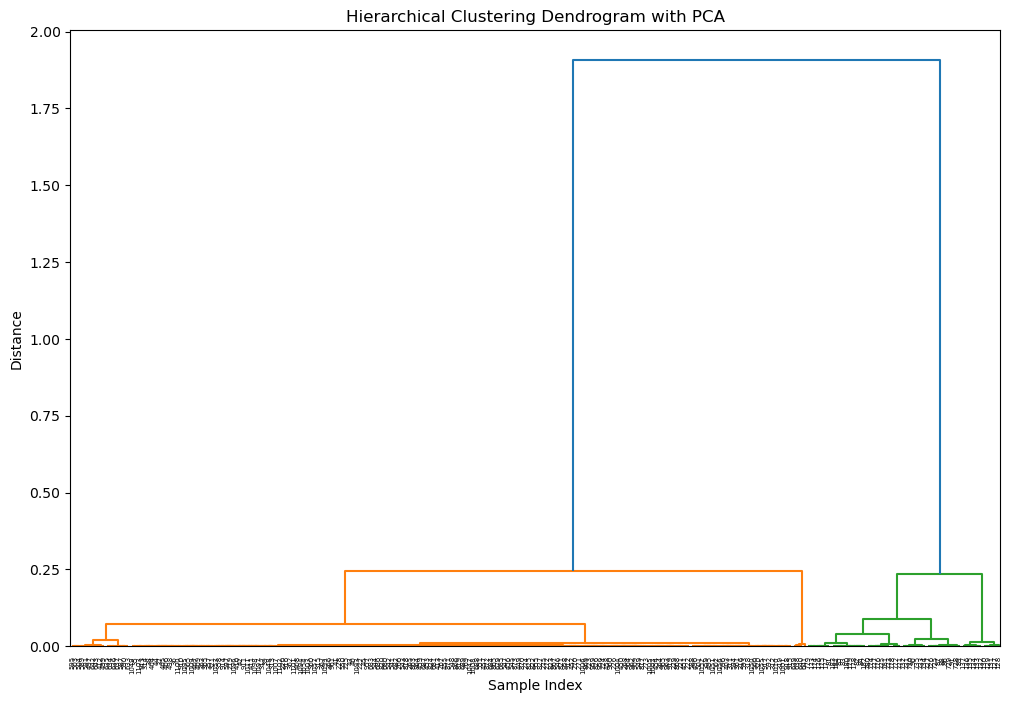

In [159]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the relevant columns

# Extract relevant features and filter data for years 2010-2020
selected_features_hr = ['murder', 'rape', 'robbery', 'Aggravated Assault', 'Breaking & Entering', 'larceny_theft', 'Motor Vehicle Theft']
df_selected_hr = df[df['year'].between(2010, 2020)][selected_features_hr]

# Normalize the data
scaler = StandardScaler()
df_normalized_hr = scaler.fit_transform(df_selected_hr)

# Apply Principal Component Analysis (PCA)
pca = PCA(n_components=2)
df_pca_hr = pd.DataFrame(pca.fit_transform(df_normalized_hr), columns=['PC1', 'PC2'])

# Apply hierarchical clustering on PCA-transformed data
linkage_matrix = linkage(df_pca_hr, method='average', metric='cosine')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', labels=df_selected_hr.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram with PCA')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()






In [162]:
# Select relevant features
selected_features_hc = (['population', 'murder', 'rape', 'robbery',
       'Aggravated Assault', 'Breaking & Entering', 'larceny_theft',
       'Motor Vehicle Theft'])
df_selected_hc = df[['jurisdiction', 'year'] + selected_features_hc]

# Group by county and sum the values for each year
df_aggregated = df_selected_hc.groupby('jurisdiction')[selected_features_hc].sum().reset_index()

# Print the aggregated DataFrame
df_aggregated

,jurisdiction,population,murder,rape,robbery,Aggravated Assault,Breaking & Entering,larceny_theft,Motor Vehicle Theft
0,Allegany County,3485117,93,792,1287,8491,21982,72008,3359
1,Anne Arundel County,21465675,769,5062,26430,68250,163699,545234,62359
2,Baltimore City,32339490,12235,19738,321524,304854,546050,1327691,310719
3,Baltimore County,33980428,1396,9961,71595,177369,304747,974760,149029
4,Calvert County,2982141,81,510,690,7349,14222,38617,2760
5,Caroline County,1314238,53,372,594,3976,9500,20702,1667
6,Carroll County,6327502,84,1241,1751,10100,26266,83072,5484
7,Cecil County,3769317,133,872,2556,14326,31132,74137,8048
8,Charles County,5272088,248,1307,5201,18853,30603,114168,13912
9,Dorchester County,1431658,94,435,1296,6774,12659,35699,2267


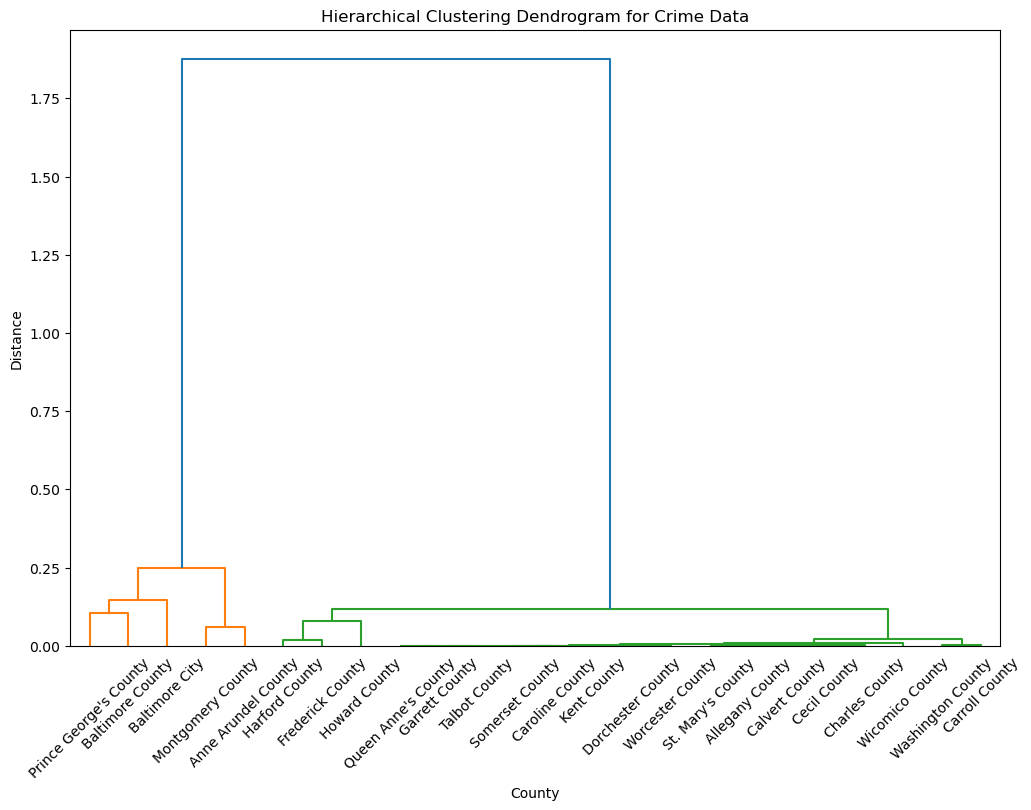

In [166]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Assuming df_aggregated is your aggregated DataFrame
df_aggregated.reset_index(drop=True, inplace=True)  # Reset the index

# You may want to normalize the data before clustering
scaler = StandardScaler()
df_normalized_hcc = scaler.fit_transform(df_aggregated[selected_features_hc])

# Apply hierarchical clustering
linkage_matrix = linkage(df_normalized_hcc, method='average', metric='cosine')

# Plot the dendrogram with county names on the x-axis
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', labels=df_aggregated['jurisdiction'].tolist(), distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram for Crime Data')
plt.xlabel('County')
plt.ylabel('Distance')
plt.show()